## **H1N1 AND SEASONAL FLU VACCINES**


**Author:** [Wallace Ouma](https://github.com/WKalawi)
***

## Business and Data Understanding

Data Source: [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/)

This project focuses on vaccination, a crucial public health strategy against infectious diseases, providing individuals with immunization and contributing to "herd immunity" when sufficiently prevalent within a community. While vaccines for COVID-19 are still in development at the time of this competition's launch, we will instead examine the public health response to a recent significant respiratory disease pandemic. Originating in spring 2009, the H1N1 influenza virus, commonly known as "swine flu," rapidly spread worldwide, causing a pandemic. Estimates suggest this virus led to between 151,000 to 575,000 deaths globally within its first year. A vaccine for H1N1 became available to the public in October 2009. Concurrently, the United States conducted the National 2009 H1N1 Flu Survey in late 2009 and early 2010, a phone survey querying respondents about their H1N1 and seasonal flu vaccine uptake alongside various personal details. These included social, economic, and demographic backgrounds, perceptions regarding illness and vaccine efficacy risks, and behaviors related to transmission prevention. Understanding how these factors interrelate with individual vaccination behavior can offer valuable insights for future public health strategies.

In this evaluation, the target variable pertains to whether an individual will voluntarily receive either an influenza or H1N1 vaccine, as indicated by past data randomly gathered from households across the United States. This data collection was conducted through random-digit-dialing of telephones within these households. Two distinct target variables exist: one for the H1N1 vaccine and another for the Seasonal Flu vaccine. These target variables are already clearly defined and binary, simplifying the preprocessing process. Given that the dataset is comprehensive, this evaluation will be approached as a supervised learning experience.

## Exploratory Data Analysis
***

**Import Data and Explore Features**

In [1]:
#Import warning
import warnings
warnings.filterwarnings('ignore')

#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the CSV files
training_labels = pd.read_csv('Datasets/training_set_labels.csv')
training_features = pd.read_csv('Datasets/training_set_features.csv')

# Merge the DataFrames on the common column 'respondent ID'
df = pd.merge(training_features,training_labels, on='respondent_id', how='inner')

# Write the merged DataFrame to a new CSV file
df.to_csv('Datasets/training_set.csv', index = False)

df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [3]:
df.shape

(26707, 38)

In [4]:
#Inspecting the data tyoes in the dataset
df.dtypes  

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [5]:
# Check for missing values in the DataFrame and sum them up
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

**Target Variables**

***Seasonal Flu Vaccine***


In [6]:
# Count the number of occurrences of each unique value in the 'seasonal_vaccine' column
df['seasonal_vaccine'].value_counts()


seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64

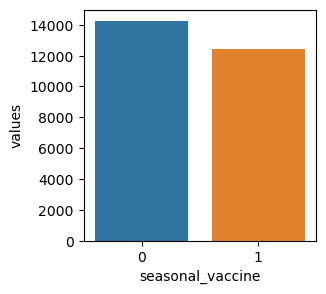

In [7]:
# Count the number of occurrences of each unique value in the 'seasonal_vaccine' column
temp = df["seasonal_vaccine"].value_counts()

# Create a DataFrame to store the counts
dfflubal = pd.DataFrame({'seasonal_vaccine': temp.index,'values': temp.values})

# Create a bar plot to visualize the counts
plt.figure(figsize = (3,3))
sns.barplot(x = 'seasonal_vaccine', y="values", data=dfflubal)
plt.show()


The count of individuals who received the flu shot is almost equivalent to those who didn't. This balance contrasts with the considerable difference seen in the recipients of the `H1N1 vaccine`.

***H1N1 Vaccine***

In [8]:
# Count the number of occurrences of each unique value in the 'h1n1_vaccine' column
df['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

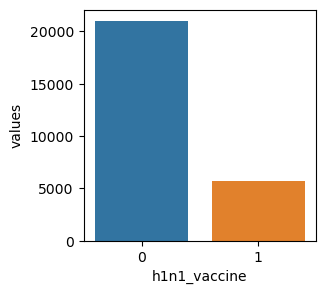

In [9]:
# Count the number of occurrences of each unique value in the 'h1n1_vaccine' column
temp = df["h1n1_vaccine"].value_counts()

# Create a DataFrame to store the counts
dfh1n1bal = pd.DataFrame({'h1n1_vaccine': temp.index,'values': temp.values})

# Create a bar plot to visualize the counts
plt.figure(figsize = (3,3))
sns.barplot(x = 'h1n1_vaccine', y="values", data=dfh1n1bal)
plt.show()


The difference in the number of individuals who received the `H1N1 vaccine` compared to those who did not is significant. The number of individuals who did not receive the vaccine is nearly four times greater than those who did. To accurately assess this situation, we should consider alternative metrics instead of relying solely on conventional averages.

**Null Values**

In [10]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Replace missing values in the current column with the most frequent value
    df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
# Retrieve the new shape of the DataFrame
df.shape

(26707, 38)

In [12]:
# Recheck for missing values in the DataFrame and sum them up
df.isnull().sum()


respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In examining the dataset, it becomes evident that several features, including `health_insurance`, `income_poverty`, `employment_industry`, and `employment_occupation`, contain significant amounts of missing values. Notably, there seems to be a potential correlation between `employment_industry` and `employment_occupation`, likely due to their similar nature. For now, the analysis will proceed without these variables. However, it's essential to acknowledge that their absence might impact the model's accuracy. Should the model's performance suffer, a reevaluation of these features will be necessary to determine suitable replacement values. Despite these omissions, the dataset still retains numerous other features without null values, which will be the basis for evaluation.

By initially excluding the features with substantial null values, the analysis aims to mitigate potential biases introduced by incomplete data. This approach allows for a focused examination of the dataset's remaining 32 features, providing insights into their individual contributions to the model's predictive capabilities. However, it's crucial to remain vigilant throughout the analysis process, as the exclusion of certain variables may inadvertently overlook valuable information. Regular reassessment and refinement of the modeling strategy will be essential to ensure a comprehensive understanding of the dataset and accurate predictions.

**Feature Engineering for Variable Exploration**

In this section, variables previously categorized as "object" will be coded into integers. The aim is to convert categorical responses into numerical ones, facilitating their more intuitive utilization.

In [13]:
# Convert age groups from categorical to numerical values
# Assigning numerical values to each age group for better representation
df.age_group[df.age_group == '18 - 34 Years'] = 1
df.age_group[df.age_group == '35 - 44 Years'] = 2
df.age_group[df.age_group == '45 - 54 Years'] = 3
df.age_group[df.age_group == '55 - 64 Years'] = 4
df.age_group[df.age_group == '65+ Years'] = 5

# Convert the 'age_group' column to integer type
df.age_group = df.age_group.astype(int)


In [14]:
# Convert education levels from categorical to numerical values
# Assigning numerical values to each education level for better representation
df.education[df.education == '< 12 Years'] = 1
df.education[df.education == '12 Years'] = 2
df.education[df.education == 'College Graduate'] = 3
df.education[df.education == 'Some College'] = 4

# Convert the 'education' column to integer type
df.education = df.education.astype(int)


In [15]:
# Convert race categories from categorical to numerical values
# Assigning numerical values to each race category for better representation
df.race[df.race == 'Black'] = 1
df.race[df.race == 'Hispanic'] = 2
df.race[df.race == 'Other or Multiple'] = 3
df.race[df.race == 'White'] = 4

# Convert the 'race' column to integer type
df.race = df.race.astype(int)


In [16]:
# Convert gender categories from categorical to numerical values
# Assigning numerical values to each gender category for better representation
df.sex[df.sex == 'Female'] = 0
df.sex[df.sex == 'Male'] = 1

# Convert the 'sex' column to integer type
df.sex = df.sex.astype(int)


In [17]:
# Convert marital status categories from categorical to numerical values
# Assigning numerical values to each marital status category for better representation
df.marital_status[df.marital_status == 'Married'] = 0
df.marital_status[df.marital_status == 'Not Married'] = 1

# Convert the 'marital_status' column to integer type
df.marital_status = df.marital_status.astype(int)


In [18]:
# Convert housing status categories from categorical to numerical values
# Assigning numerical values to each housing status category for better representation
df.rent_or_own[df.rent_or_own == 'Rent'] = 0
df.rent_or_own[df.rent_or_own == 'Own'] = 1

# Convert the 'rent_or_own' column to integer type
df.rent_or_own = df.rent_or_own.astype(int)


In [19]:
# Convert employment status categories from categorical to numerical values
# Assigning numerical values to each employment status category for better representation
df.employment_status[df.employment_status == 'Employed'] = 1
df.employment_status[df.employment_status == 'Not in Labor Force'] = 2
df.employment_status[df.employment_status == 'Unemployed'] = 3

# Convert the 'employment_status' column to integer type
df.employment_status = df.employment_status.astype(int)


In [20]:
# Convert HHS geographic regions from categorical to numerical values
# Assigning numerical values to each HHS geographic region for better representation
df.hhs_geo_region[df.hhs_geo_region == 'atmpeygn'] = 1
df.hhs_geo_region[df.hhs_geo_region == 'bhuqouqj'] = 2
df.hhs_geo_region[df.hhs_geo_region == 'dqpwygqj'] = 3
df.hhs_geo_region[df.hhs_geo_region == 'fpwskwrf'] = 4
df.hhs_geo_region[df.hhs_geo_region == 'kbazzjca'] = 5
df.hhs_geo_region[df.hhs_geo_region == 'lrircsnp'] = 6
df.hhs_geo_region[df.hhs_geo_region == 'lzgpxyit'] = 7
df.hhs_geo_region[df.hhs_geo_region == 'mlyzmhmf'] = 8
df.hhs_geo_region[df.hhs_geo_region == 'oxchjgsf'] = 9
df.hhs_geo_region[df.hhs_geo_region == 'qufhixun'] = 10

# Convert the 'hhs_geo_region' column to integer type
df.hhs_geo_region = df.hhs_geo_region.astype(int)


In [21]:
# Convert Census MSA categories from categorical to numerical values
# Assigning numerical values to each Census MSA category for better representation
df.census_msa[df.census_msa == 'MSA, Not Principle  City'] = 1
df.census_msa[df.census_msa == 'MSA, Principle City'] = 2
df.census_msa[df.census_msa == 'Non-MSA'] = 3

# Convert the 'census_msa' column to integer type
df.census_msa = df.census_msa.astype(int)


In [22]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int32
education                        int32
race                             int32
sex                      

**Outlier Detection**

In [23]:
# Grouping numeric columns into separate lists for easier manipulation
num_cols1 = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask']
num_cols2 = ['behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1']
num_cols3 = ['doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance']
num_cols4 = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

<Axes: >

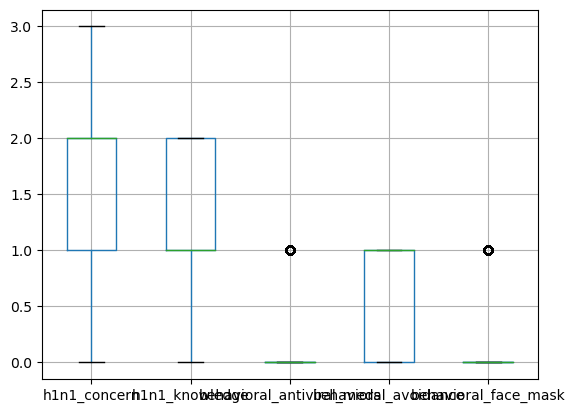

In [24]:
df.boxplot(num_cols1)

<Axes: >

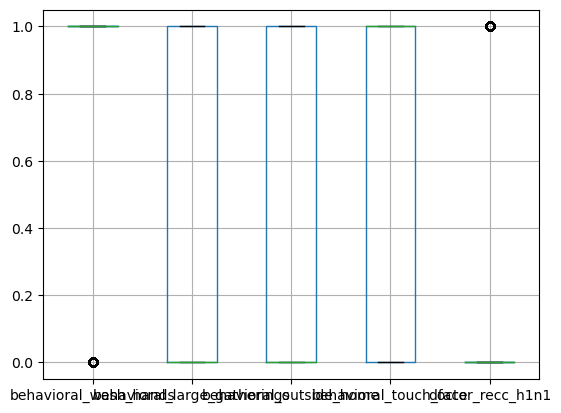

In [25]:
df.boxplot(num_cols2)

<Axes: >

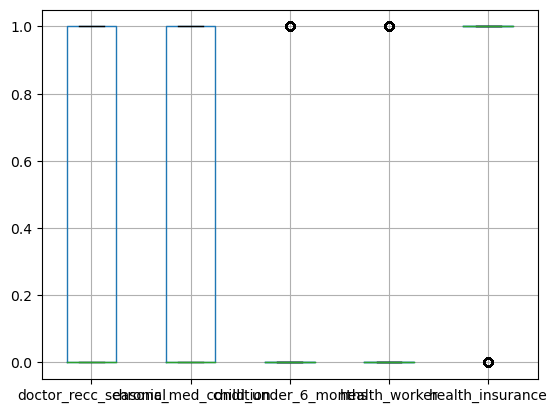

In [26]:
df.boxplot(num_cols3)

<Axes: >

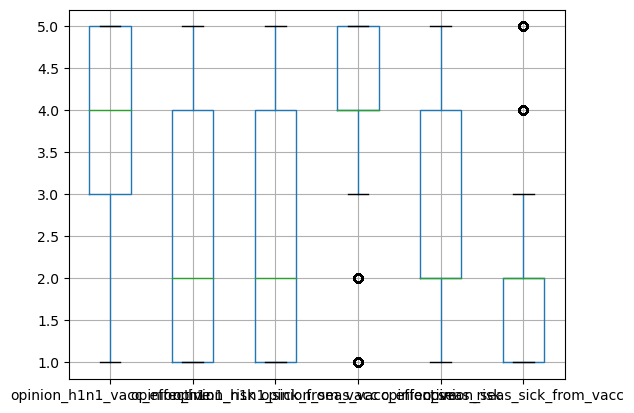

In [27]:
df.boxplot(num_cols4)

## Feature Interaction

**H1N1**

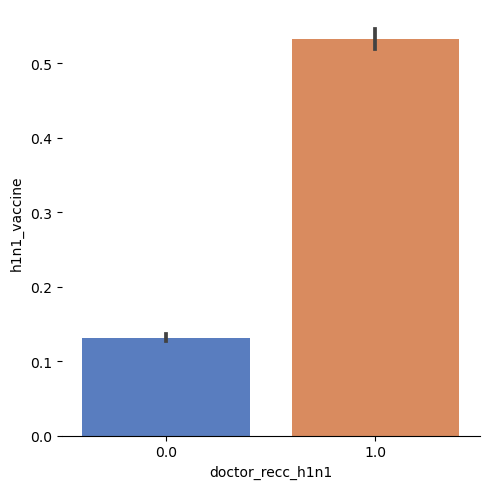

In [28]:
# Create a bar plot to explore the relationship between doctor recommendation for H1N1 vaccine and H1N1 vaccine uptake
b = sns.catplot(x="doctor_recc_h1n1", y="h1n1_vaccine", data=df, kind="bar", height=5, palette="muted")

# Remove the left spine of the plot
b.despine(left=True)

# Set the y-label for the plot
b = b.set_ylabels("h1n1_vaccine")


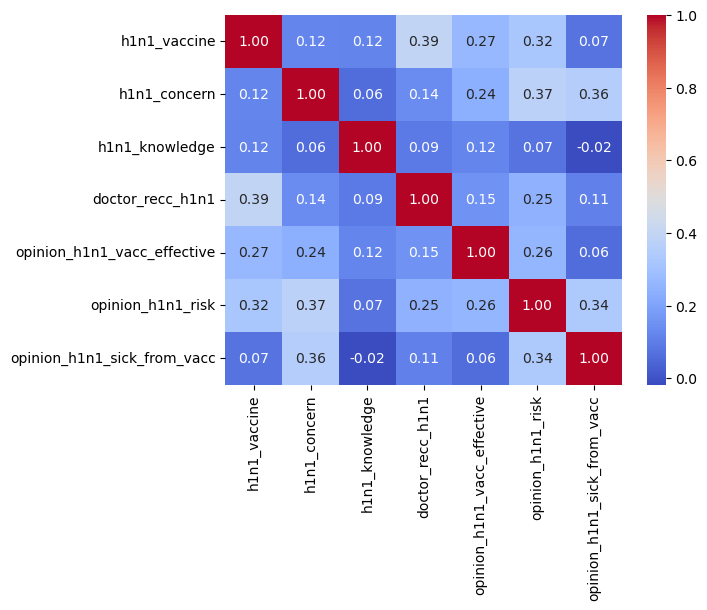

In [29]:
# Create a heatmap to visualize the correlation between selected columns in the dataframe
b = sns.heatmap(df[["h1n1_vaccine", "h1n1_concern", "h1n1_knowledge", "doctor_recc_h1n1", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")


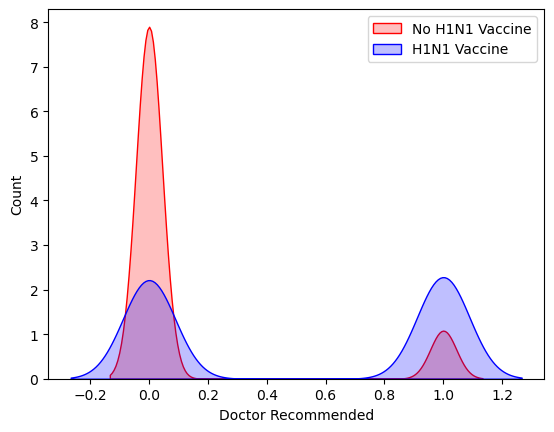

In [30]:
# Create a kernel density plot for the distribution of doctor recommendations for H1N1 vaccine among non-recipients and recipients
b = sns.kdeplot(df["doctor_recc_h1n1"][(df["h1n1_vaccine"] == 0) & (df["doctor_recc_h1n1"].notnull())], color="Red", shade=True)

# Overlay another kernel density plot for the distribution of doctor recommendations for H1N1 vaccine among recipients
b = sns.kdeplot(df["doctor_recc_h1n1"][(df["h1n1_vaccine"] == 1) & (df["doctor_recc_h1n1"].notnull())], ax=b, color="Blue", shade=True)

# Set labels for the x and y axes
b.set_xlabel("Doctor Recommended")
b.set_ylabel("Count")

# Add a legend to differentiate between H1N1 vaccine recipients and non-recipients
b = b.legend(["No H1N1 Vaccine", "H1N1 Vaccine"])


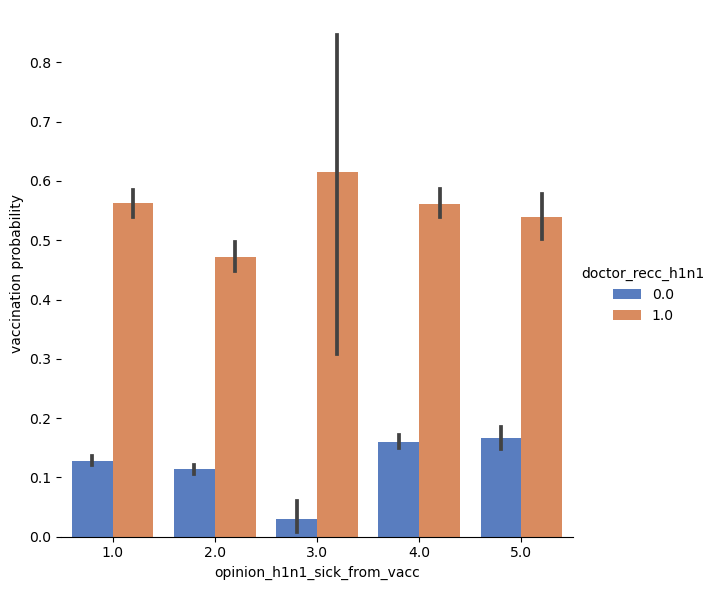

In [31]:
# Create a grouped bar plot to explore the relationship between opinions about getting sick from the H1N1 vaccine, doctor recommendation for H1N1 vaccine, and H1N1 vaccine uptake
b = sns.catplot(x="opinion_h1n1_sick_from_vacc", y="h1n1_vaccine", hue="doctor_recc_h1n1", data=df,
                height=6, kind="bar", palette="muted")

# Remove the left spine of the plot
b.despine(left=True)

# Set the y-label for the plot
b = b.set_ylabels("vaccination probability")


**Seasonal Flu Vaccine**

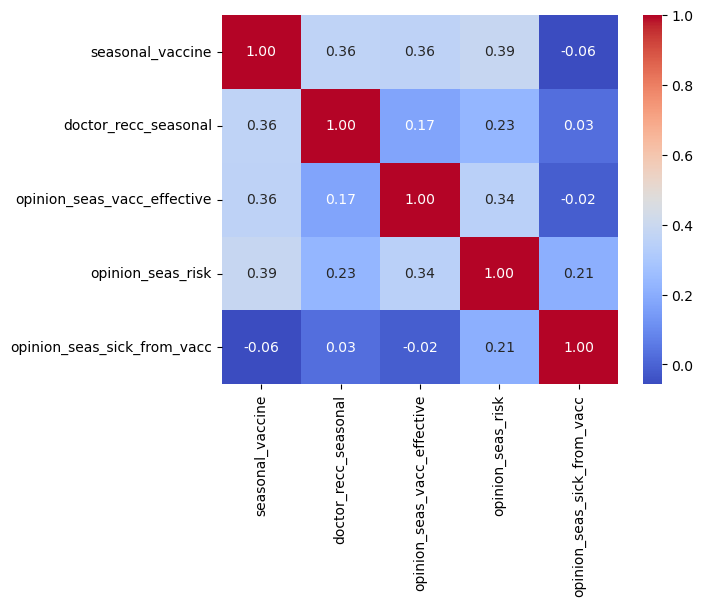

In [32]:
# Create a heatmap to visualize the correlation matrix between selected columns related to seasonal flu vaccination
b = sns.heatmap(df[["seasonal_vaccine", "doctor_recc_seasonal", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"]].corr(), annot=True, fmt=".2f", cmap="coolwarm")


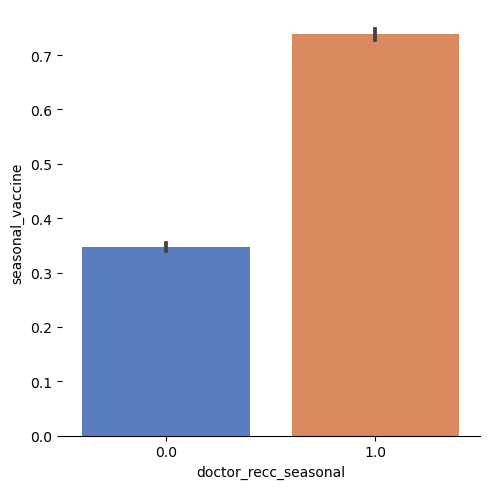

In [33]:
# Create a bar plot to explore the relationship between doctor recommendation for seasonal flu vaccine and seasonal flu vaccine uptake
b = sns.catplot(x="doctor_recc_seasonal", y="seasonal_vaccine", data=df, kind="bar", height=5, palette="muted")

# Remove the left spine of the plot
b.despine(left=True)

# Set the y-label for the plot
b = b.set_ylabels("seasonal_vaccine")


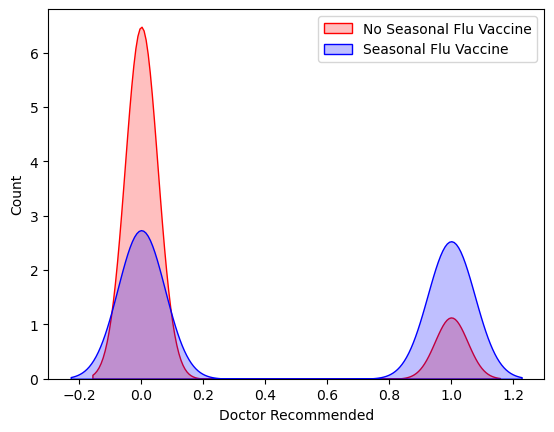

In [34]:
# Create a kernel density plot for the distribution of doctor recommendations for seasonal flu vaccine among non-recipients and recipients
b = sns.kdeplot(df["doctor_recc_seasonal"][(df["seasonal_vaccine"] == 0) & (df["doctor_recc_seasonal"].notnull())], color="Red", shade=True)

# Overlay another kernel density plot for the distribution of doctor recommendations for seasonal flu vaccine among recipients
b = sns.kdeplot(df["doctor_recc_seasonal"][(df["seasonal_vaccine"] == 1) & (df["doctor_recc_seasonal"].notnull())], ax=b, color="Blue", shade=True)

# Set labels for the x and y axes
b.set_xlabel("Doctor Recommended")
b.set_ylabel("Count")

# Add a legend to differentiate between seasonal flu vaccine recipients and non-recipients
b = b.legend(["No Seasonal Flu Vaccine", "Seasonal Flu Vaccine"])


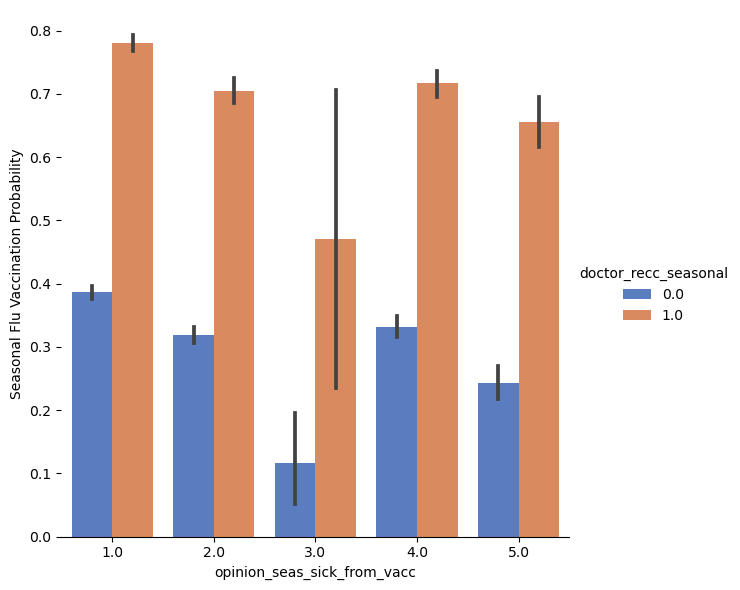

In [35]:
# Create a grouped bar plot to explore the relationship between opinions about getting sick from the seasonal flu vaccine, doctor recommendation for seasonal flu vaccine, and seasonal flu vaccine uptake
b = sns.catplot(x="opinion_seas_sick_from_vacc", y="seasonal_vaccine", hue="doctor_recc_seasonal", data=df,
                height=6, kind="bar", palette="muted")

# Remove the left spine of the plot
b.despine(left=True)

# Set the y-label for the plot
b = b.set_ylabels("Seasonal Flu Vaccination Probability")


**Feature Engineering - One Hot Encoding**

In [36]:
# Convert categorical variables into dummy/indicator variables and concatenate them with the original dataframe
df = pd.concat([df, pd.get_dummies(df['census_msa'], prefix='census_msa'),
                pd.get_dummies(df['age_group'], prefix='age'),
                pd.get_dummies(df['sex'], prefix='sex'),
                pd.get_dummies(df['race'], prefix='race'),
                pd.get_dummies(df['rent_or_own'], prefix='rent_or_own'),
                pd.get_dummies(df['marital_status'], prefix='marital_status'),
                pd.get_dummies(df['education'], prefix='education'),
                pd.get_dummies(df['hhs_geo_region'], prefix='hhs_geo_region')], axis=1)

# Drop the original categorical variables from the dataframe
df.drop(['census_msa', 'age_group', 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 'hhs_geo_region'], axis=1, inplace=True)


In [37]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_1,hhs_geo_region_2,hhs_geo_region_3,hhs_geo_region_4,hhs_geo_region_5,hhs_geo_region_6,hhs_geo_region_7,hhs_geo_region_8,hhs_geo_region_9,hhs_geo_region_10
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,True,False,False,False,False,False,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True


In [38]:
df.dtypes

respondent_id                  int64
h1n1_concern                 float64
h1n1_knowledge               float64
behavioral_antiviral_meds    float64
behavioral_avoidance         float64
                              ...   
hhs_geo_region_6                bool
hhs_geo_region_7                bool
hhs_geo_region_8                bool
hhs_geo_region_9                bool
hhs_geo_region_10               bool
Length: 62, dtype: object

## Modeling


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import model_selection,linear_model, datasets
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [40]:
# Select specific variables to use by dropping certain columns from the dataframe
df_use = df.drop(['health_insurance', 'income_poverty', 'employment_industry', 'employment_occupation'], axis=1)

**Split Training Test Data**

In [41]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [42]:
# Splitting test and training data for H1N1 vaccine prediction
X1 = df_use.loc[:, ~df_use.columns.isin(['h1n1_vaccine', 'respondent_id'])]
y1 = df_use["h1n1_vaccine"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

# Splitting test and training data for Seasonal Flu vaccine prediction
X2 = df_use.loc[:, ~df_use.columns.isin(['seasonal_vaccine', 'respondent_id'])]
y2 = df_use["seasonal_vaccine"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

# Scaling the features
scaler = StandardScaler()  
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)


**Feature Selection - Lasso Regression**

**H1N1**

In [43]:
# Initialize SelectFromModel with Logistic Regression as the estimator
sel_1 = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))

# Fit SelectFromModel to the training data for H1N1 vaccine prediction
sel_1.fit(X1_train, y1_train)


SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [44]:
# Get the selected features from SelectFromModel
selected_features_1 = sel_1.get_support()

# Print the selected features
print(selected_features_1)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True False  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True False]


In [45]:
# Initialize SimpleImputer
my_imputer1 = SimpleImputer()

# Impute missing values in the training data for H1N1 vaccine prediction
imputed_X1_train = pd.DataFrame(my_imputer1.fit_transform(X1_train))

# Imputation removed column names; put them back
imputed_X1_train.columns = X1.columns

# Get selected features from SelectFromModel
selected_feat1 = imputed_X1_train.columns[(sel_1.get_support())]

# Print the total number of features and the number of selected features
print('Total features: {}'.format(X1_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat1)))

Total features: 56
Selected features: 50


In [46]:
# Print the selected features
print(selected_feat1)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'employment_status',
       'household_adults', 'household_children', 'seasonal_vaccine',
       'census_msa_1', 'census_msa_3', 'age_1', 'age_2', 'age_3', 'age_4',
       'sex_0', 'sex_1', 'race_1', 'race_2', 'race_3', 'rent_or_own_0',
       'marital_status_0', 'marital_status_1', 'education_1', 'education_3',
       'education_4', 'hhs_geo_region_1', 'hhs_geo_region_2',
       'hhs_geo_region_3', 'hhs_geo_region_4', 'hhs_geo_region_5',
      

**Seasonal Flu**

In [47]:
# Initialize SelectFromModel with Logistic Regression as the estimator
sel_2 = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))

# Fit SelectFromModel to the training data for Seasonal Flu vaccine prediction
sel_2.fit(X2_train, y2_train)


SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [48]:
# Get the selected features from SelectFromModel
selected_features_2 = sel_2.get_support()

# Print the selected features
selected_features_2

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True])

In [49]:

# Initialize SimpleImputer
my_imputer2 = SimpleImputer()

# Impute missing values in the training data for Seasonal Flu vaccine prediction
imputed_X2_train = pd.DataFrame(my_imputer2.fit_transform(X2_train))

# Imputation removed column names; put them back
imputed_X2_train.columns = X2.columns

# Get selected features from SelectFromModel
selected_feat2 = imputed_X2_train.columns[(sel_2.get_support())]

# Print the total number of features, the number of selected features, and the number of features with coefficients shrank to zero
print('Total features: {}'.format(X2_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat2)))
print('Features with coefficients shrank to zero: {}'.format(np.sum(sel_2.estimator_.coef_ == 0)))

Total features: 56
Selected features: 52
Features with coefficients shrank to zero: 3


In [50]:
# Print the selected features for H1N1 vaccine prediction
print(selected_feat1)


Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'employment_status',
       'household_adults', 'household_children', 'seasonal_vaccine',
       'census_msa_1', 'census_msa_3', 'age_1', 'age_2', 'age_3', 'age_4',
       'sex_0', 'sex_1', 'race_1', 'race_2', 'race_3', 'rent_or_own_0',
       'marital_status_0', 'marital_status_1', 'education_1', 'education_3',
       'education_4', 'hhs_geo_region_1', 'hhs_geo_region_2',
       'hhs_geo_region_3', 'hhs_geo_region_4', 'hhs_geo_region_5',
      

**Feature Specification**

In [51]:
# Transform the training and test data for H1N1 vaccine prediction using selected features
X1_train_sel = sel_1.transform(X1_train)
X1_test_sel = sel_1.transform(X1_test)

# Transform the training and test data for Seasonal Flu vaccine prediction using selected features
X2_train_sel = sel_2.transform(X2_train)
X2_test_sel = sel_2.transform(X2_test)

# Display the shapes of the transformed data for H1N1 vaccine prediction
X1_train_sel.shape, X1_test_sel.shape

((21365, 50), (5342, 50))

In [52]:
# Print the shapes of the original data for H1N1 vaccine prediction
X1_train.shape, X1_test.shape

((21365, 56), (5342, 56))

In [53]:
# Print the shapes of the transformed data for Seasonal Flu vaccine prediction
X2_train_sel.shape, X2_test_sel.shape

((21365, 52), (5342, 52))

In [54]:
# Print the shapes of the original data for Seasonal Flu vaccine prediction
X2_train.shape, X2_test.shape

((21365, 56), (5342, 56))

## Modeling- H1N1

**Logistic Regression**

In [55]:
# Logistic Regression for H1N1 vaccine prediction
lr = LogisticRegression()

# Fit the model
lrfit = lr.fit(X1_train_sel, y1_train)

# Predict on the test set
y_pred = lr.predict(X1_test_sel)

# Print evaluation metrics
print('Accuracy: %.2f' % lr.score(X1_test_sel, y1_test))
print('Precision: %.3f' % precision_score(y_true=y1_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y1_test, y_pred=y_pred))
print('F1 Score: %.3f' % f1_score(y_true=y1_test, y_pred=y_pred))
print('Misclassified samples: %d' % (y1_test != y_pred).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y1_test, lrfit.predict_proba(X1_test_sel)[:, 1]))


Accuracy: 0.85
Precision: 0.711
Recall: 0.527
F1 Score: 0.605
Misclassified samples: 788
ROC/AUC Score: 0.872


**Gradient Boosting**

In [56]:
# Gradient Boosting for H1N1 vaccine prediction
gradient_boosting_h1n1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                                    max_depth=1, random_state=0).fit(X1_train_sel, y1_train)

# Predict on the test set
gbc_y_pred = gradient_boosting_h1n1.predict(X1_test_sel)

# Print evaluation metrics
print('Accuracy: %.2f' % gradient_boosting_h1n1.score(X1_test_sel, y1_test))
print('Precision: %.3f' % precision_score(y_true=y1_test, y_pred=gbc_y_pred))
print('Recall: %.3f' % recall_score(y_true=y1_test, y_pred=gbc_y_pred))
print('F1 Score: %.3f' % f1_score(y_true=y1_test, y_pred=gbc_y_pred))
print('Misclassified samples: %d' % (y1_test != gbc_y_pred).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y1_test, gradient_boosting_h1n1.predict_proba(X1_test_sel)[:, 1]))


Accuracy: 0.85
Precision: 0.706
Recall: 0.524
F1 Score: 0.601
Misclassified samples: 796
ROC/AUC Score: 0.874


**K-Nearest Neighbors**

In [57]:
# K Nearest Neighbors for H1N1 vaccine prediction
knn = KNeighborsClassifier(n_neighbors=10)
kfit = knn.fit(X1_train_sel, y1_train)

# Predict on the test set
knn_y1_pred = knn.predict(X1_test_sel)

# Print evaluation metrics
print('Accuracy: %.2f' % knn.score(X1_test_sel, y1_test))
print('Precision: %.3f' % precision_score(y_true=y1_test, y_pred=knn_y1_pred))
print('Recall: %.3f' % recall_score(y_true=y1_test, y_pred=knn_y1_pred))
print('F1 Score: %.3f' % f1_score(y_true=y1_test, y_pred=knn_y1_pred))
print('Misclassified samples: %d' % (y1_test != knn_y1_pred).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y1_test, kfit.predict_proba(X1_test_sel)[:, 1]))


Accuracy: 0.82
Precision: 0.706
Recall: 0.243
F1 Score: 0.361
Misclassified samples: 984
ROC/AUC Score: 0.779


**Decision Tree**

In [58]:
# Decision Tree for H1N1 vaccine prediction
dt = DecisionTreeClassifier(max_depth=10, random_state=123)
dtfit = dt.fit(X1_train_sel, y1_train)

# Predict on the test set
dt_y_pred = dt.predict(X1_test_sel)

# Print evaluation metrics
print('Accuracy: %.2f' % dt.score(X1_test_sel, y1_test))
print('Precision: %.3f' % precision_score(y_true=y1_test, y_pred=dt_y_pred))
print('Recall: %.3f' % recall_score(y_true=y1_test, y_pred=dt_y_pred))
print('F1 Score: %.3f' % f1_score(y_true=y1_test, y_pred=dt_y_pred))
print('Misclassified samples: %d' % (y1_test != dt_y_pred).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y1_test, dtfit.predict_proba(X1_test_sel)[:, 1]))


Accuracy: 0.83
Precision: 0.633
Recall: 0.538
F1 Score: 0.581
Misclassified samples: 887
ROC/AUC Score: 0.817


In [59]:
# Define the parameter grid
param_grid = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}

# Create a DecisionTreeClassifier instance
tree = DecisionTreeClassifier()

# RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_grid, cv=10, n_iter=100, random_state=0)

# Fit the RandomizedSearchCV to the data
tree_cv.fit(X1_train_sel, y1_train)

# Print the tuned parameters and best score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))


Tuned Decision Tree Parameters: {'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 7, 'criterion': 'entropy'}


In [60]:
# Create a DecisionTreeClassifier instance with tuned parameters
dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features=9, min_samples_leaf=1, random_state=123)

# Fit the model on the training data
dt_tuned.fit(X1_train_sel, y1_train)

# Predict on the test data
dt_y_pred_tuned = dt_tuned.predict(X1_test_sel)

# Calculate and print evaluation metrics
print()
print('Accuracy %.2f' % dt_tuned.score(X1_test_sel, y1_test))
print('Precision: %.3f' % precision_score(y_true=y1_test, y_pred=dt_y_pred_tuned))
print('Recall: %.3f' % recall_score(y_true=y1_test, y_pred=dt_y_pred_tuned))
print('F1: %.3f' % f1_score(y_true=y1_test, y_pred=dt_y_pred_tuned))
print('Misclassified samples: %d' % (y1_test != dt_y_pred_tuned).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y1_test, dt_tuned.predict_proba(X1_test_sel)[:, 1]))



Accuracy 0.83
Precision: 0.706
Recall: 0.367
F1: 0.483
Misclassified samples: 900
ROC/AUC Score: 0.824


**Voting Classifier Ensemble Modeling**

In [61]:
# Define the KFold cross-validation
kfold_vc = model_selection.KFold(n_splits=10, random_state=10, shuffle=True)

# Define a list of estimators for the VotingClassifier
estimators = [
    ('logistic', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ('rf', RandomForestClassifier()),
    ('rfcv', RandomForestClassifier(min_samples_leaf=4, max_depth=19, random_state=123)),
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=123)),
    ('dt2', DecisionTreeClassifier(criterion='gini', max_depth=6, max_features=9, min_samples_leaf=1, random_state=123))
]

# Create the VotingClassifier ensemble
ensemble = VotingClassifier(estimators)

# Perform cross-validation to evaluate the ensemble
vc_roc_score = cross_val_score(ensemble, X1_train_sel, y1_train, cv=kfold_vc)
results_vc = cross_val_score(ensemble, X1_train_sel, y1_train, cv=kfold_vc)

# Fit the VotingClassifier on the training data
vc = ensemble.fit(X1_train_sel, y1_train)

# Predict on the test data
vc_y_pred = vc.predict(X1_test_sel)

# Calculate and print evaluation metrics
print('Accuracy %.2f' % vc.score(X1_test_sel, y1_test))
print('Precision: %.3f' % precision_score(y_true=y1_test, y_pred=vc_y_pred))
print('Recall: %.3f' % recall_score(y_true=y1_test, y_pred=vc_y_pred))
print('F1: %.3f' % f1_score(y_true=y1_test, y_pred=vc_y_pred))
print('Misclassified samples: %d' % (y1_test != vc_y_pred).sum())
print('ROC/AUC Score: %.3f' % np.mean(vc_roc_score))


Accuracy 0.85
Precision: 0.734
Recall: 0.484
F1: 0.584
Misclassified samples: 792
ROC/AUC Score: 0.852


**Random Forest**

In [62]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000)

# Fit the model on the training data
rfit = rf.fit(X1_train_sel, y1_train)

# Predict on the test data
rf_y_pred = rf.predict(X1_test_sel)

# Calculate and print evaluation metrics
print('Accuracy %.2f' % rf.score(X1_test_sel, y1_test))
print('Precision: %.3f' % precision_score(y_true=y1_test, y_pred=rf_y_pred))
print('Recall: %.3f' % recall_score(y_true=y1_test, y_pred=rf_y_pred))
print('F1: %.3f' % f1_score(y_true=y1_test, y_pred=rf_y_pred))
print('Misclassified samples: %d' % (y1_test != rf_y_pred).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y1_test, rfit.predict_proba(X1_test_sel)[:, 1]))


Accuracy 0.85
Precision: 0.736
Recall: 0.479
F1: 0.580
Misclassified samples: 794
ROC/AUC Score: 0.874


In [63]:
# Random Forest Classifier with Cross Validation
param_dist_rf = {
    "max_depth": [int(x) for x in np.linspace(1, 19, num=10)],
    "min_samples_leaf": [1, 2, 4, 6]
}

# Random Forest Classifier object
rf_model = RandomForestClassifier()

# Randomized Search CV object
rf_cv = RandomizedSearchCV(rf_model, param_distributions=param_dist_rf, cv=5, scoring='roc_auc', random_state=123, n_jobs=-1)

# Fit the model on the training data
rf_cv_fit = rf_cv.fit(X1_train_sel, y1_train)

# Predict on the test data
rf_y_pred = rf_cv_fit.predict(X1_test_sel)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv_fit.best_params_))


Tuned Random Forest Parameters: {'min_samples_leaf': 6, 'max_depth': 11}


In [64]:
# Random Forest Classifier with Tuned Parameters and Cross Validation

# Define the Random Forest model with tuned parameters
rf_model1 = RandomForestClassifier(min_samples_leaf=4, max_depth=19, random_state=123)

# Define the RandomizedSearchCV object with specified parameters
rf_cv_model1 = RandomizedSearchCV(rf_model1, param_distributions=param_dist_rf, cv=10, scoring='roc_auc', random_state=123, n_jobs=-1)

# Fit the RandomizedSearchCV model to the training data
rf_cv_fit1 = rf_cv_model1.fit(X1_train_sel, y1_train)

# Predict the target variable using the test data
rf_y_pred1 = rf_cv_fit1.predict(X1_test_sel)

# Print evaluation metrics
print('Accuracy %.2f' % rf_cv_fit1.score(X1_test_sel, y1_test))
print('Precision: %.3f' % precision_score(y_true=y1_test, y_pred=rf_y_pred1))
print('Recall: %.3f' % recall_score(y_true=y1_test, y_pred=rf_y_pred1))
print('F1: %.3f' % f1_score(y_true=y1_test, y_pred=rf_y_pred1))
print('Misclassified samples: %d' % (y1_test != rf_y_pred1).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y1_test, rf_cv_fit1.predict_proba(X1_test_sel)[:, 1]))


Accuracy 0.88
Precision: 0.734
Recall: 0.469
F1: 0.573
Misclassified samples: 803
ROC/AUC Score: 0.875


## Modeling - Seasonal Flu

**Logistic Regression**

In [65]:
# Logistic Regression Evaluation

# Instantiate Logistic Regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_fit = lr_model.fit(X2_train_sel, y2_train)

# Predict the target variable using the test data
y_pred_lr = lr_fit.predict(X2_test_sel)

# Print evaluation metrics
print('Accuracy %.2f' % lr_fit.score(X2_test_sel, y2_test))
print('Precision: %.3f' % precision_score(y_true=y2_test, y_pred=y_pred_lr))
print('Recall: %.3f' % recall_score(y_true=y2_test, y_pred=y_pred_lr))
print('F1: %.3f' % f1_score(y_true=y2_test, y_pred=y_pred_lr))
print('Misclassified samples: %d' % (y2_test != y_pred_lr).sum())
print('ROC/AUC Score: %.3f'% roc_auc_score(y2_test, lr_fit.predict_proba(X2_test_sel)[:, 1]))


Accuracy 0.80
Precision: 0.797
Recall: 0.756
F1: 0.776
Misclassified samples: 1065
ROC/AUC Score: 0.875


**Gradient Boosting**

In [66]:
# Gradient Boosting Evaluation

# Instantiate Gradient Boosting model
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                       max_depth=1, random_state=0)

# Fit the model to the training data
gbc_fit = gbc_model.fit(X2_train_sel, y2_train)

# Predict the target variable using the test data
gbc_y_pred = gbc_fit.predict(X2_test_sel)

# Print evaluation metrics
print('Accuracy %.2f' % gbc_fit.score(X2_test_sel, y2_test))
print('Precision: %.3f' % precision_score(y_true=y2_test, y_pred=gbc_y_pred))
print('Recall: %.3f' % recall_score(y_true=y2_test, y_pred=gbc_y_pred))
print('F1: %.3f' % f1_score(y_true=y2_test, y_pred=gbc_y_pred))
print('Misclassified samples: %d' % (y2_test != gbc_y_pred).sum())
print('ROC/AUC Score: %.3f'% roc_auc_score(y2_test, gbc_fit.predict_proba(X2_test_sel)[:, 1]))


Accuracy 0.80
Precision: 0.801
Recall: 0.760
F1: 0.780
Misclassified samples: 1048
ROC/AUC Score: 0.880


**Random Forest**

In [67]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000)
rffit = rf.fit(X2_train_sel, y2_train)
rf_y_pred = rf.predict(X2_test_sel)

# Print evaluation metrics
print('Accuracy %.2f' % rf.score(X2_test_sel, y2_test))
print('Precision: %.3f' % precision_score(y_true=y2_test, y_pred=rf_y_pred))
print('Recall: %.3f' % recall_score(y_true=y2_test, y_pred=rf_y_pred))
print('F1: %.3f' % f1_score(y_true=y2_test, y_pred=rf_y_pred))
print('Misclassified samples: %d' % (y2_test != rf_y_pred).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y2_test, rffit.predict_proba(X2_test_sel)[:, 1]))

Accuracy 0.80
Precision: 0.791
Recall: 0.778
F1: 0.784
Misclassified samples: 1046
ROC/AUC Score: 0.878


In [68]:
# Random Forest with Cross Validation
param_dist = {
    "max_depth": [int(x) for x in np.linspace(1, 19, num=10)],
    "min_samples_leaf": [1, 2, 4, 6],
}

# Initialize Random Forest classifier
rf2 = RandomForestClassifier()

# RandomizedSearchCV object: rf_cv2
rf_cv2 = RandomizedSearchCV(rf2, param_distributions=param_dist, 
                            cv=10, scoring='roc_auc', random_state=123, n_jobs=-1)

# Fit the model to the data
rfcv2fit = rf_cv2.fit(X2_train_sel, y2_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rfcv2fit.best_params_))

Tuned Random Forest Parameters: {'min_samples_leaf': 4, 'max_depth': 19}


In [69]:
# Use the tuned parameters to train a new Random Forest model
rf2 = RandomForestClassifier(**rfcv2fit.best_params_, random_state=123)
rf2fit = rf2.fit(X2_train_sel, y2_train)
rf_y_pred2 = rf2.predict(X2_test_sel)

# Print evaluation metrics
print('Accuracy %.2f' % rf2.score(X2_test_sel, y2_test))
print('Precision: %.3f' % precision_score(y_true=y2_test, y_pred=rf_y_pred2))
print('Recall: %.3f' % recall_score(y_true=y2_test, y_pred=rf_y_pred2))
print('F1: %.3f' % f1_score(y_true=y2_test, y_pred=rf_y_pred2))
print('Misclassified samples: %d' % (y2_test != rf_y_pred2).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y2_test, rfcv2fit.predict_proba(X2_test_sel)[:, 1]))

Accuracy 0.80
Precision: 0.789
Recall: 0.779
F1: 0.784
Misclassified samples: 1047
ROC/AUC Score: 0.880


**K-Nearest Neighbors**

In [70]:
# K Nearest Neighbors Evaluation

# Instantiate K Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
kfit = knn_model.fit(X2_train_sel, y2_train)

# Predict the target variable using the test data
knn_y_pred = knn_model.predict(X2_test_sel)

# Print evaluation metrics
print('Accuracy %.2f' % knn_model.score(X2_test_sel, y2_test))
print('Precision: %.3f' % precision_score(y_true=y2_test, y_pred=knn_y_pred))
print('Recall: %.3f' % recall_score(y_true=y2_test, y_pred=knn_y_pred))
print('F1: %.3f' % f1_score(y_true=y2_test, y_pred=knn_y_pred))
print('Misclassified samples: %d' % (y2_test != knn_y_pred).sum())
print('ROC/AUC Score: %.3f'% roc_auc_score(y2_test, kfit.predict_proba(X2_test_sel)[:, 1]))


Accuracy 0.74
Precision: 0.783
Recall: 0.611
F1: 0.686
Misclassified samples: 1363
ROC/AUC Score: 0.814


**Decision Tree**

In [71]:
# Instantiate Decision Tree model with specified parameters
dt_model = DecisionTreeClassifier(max_depth=10, random_state=123)

# Fit the model to the training data
dtfit = dt_model.fit(X2_train_sel, y2_train)

# Predict the target variable using the test data
dt_y_pred = dt_model.predict(X2_test_sel)

# Print evaluation metrics
print('Accuracy %.2f' % dt_model.score(X2_test_sel, y2_test))
print('Precision: %.3f' % precision_score(y_true=y2_test, y_pred=dt_y_pred))
print('Recall: %.3f' % recall_score(y_true=y2_test, y_pred=dt_y_pred))
print('F1: %.3f' % f1_score(y_true=y2_test, y_pred=dt_y_pred))
print('Misclassified samples: %d' % (y2_test != dt_y_pred).sum())
print('ROC/AUC Score: %.3f'% roc_auc_score(y2_test, dtfit.predict_proba(X2_test_sel)[:, 1]))


Accuracy 0.78
Precision: 0.759
Recall: 0.761
F1: 0.760
Misclassified samples: 1173
ROC/AUC Score: 0.829


In [72]:
# Randomized Search for Decision Tree Parameters
param_dist = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}

# Initialize Decision Tree model
tree = DecisionTreeClassifier()

# RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=10, n_iter=100, random_state=123)

# Fit the model to the data
tree_cv.fit(X2_train_sel, y2_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))



Tuned Decision Tree Parameters: {'min_samples_leaf': 9, 'max_features': 9, 'max_depth': 9, 'criterion': 'gini'}


In [73]:
# Using the tuned decision tree parameters
dt2 = DecisionTreeClassifier(**tree_cv.best_params_, random_state=123)
dt2fit = dt2.fit(X2_train_sel, y2_train)
dt_y_pred2 = dt2.predict(X2_test_sel)

# Print evaluation metrics
print()
print('Accuracy %.2f' % dt2.score(X2_test_sel, y2_test))
print('Precision: %.3f' % precision_score(y_true=y2_test, y_pred=dt_y_pred2))
print('Recall: %.3f' % recall_score(y_true=y2_test, y_pred=dt_y_pred2))
print('F1: %.3f' % f1_score(y_true=y2_test, y_pred=dt_y_pred2))
print('Misclassified samples: %d' % (y2_test != dt_y_pred2).sum())
print('ROC/AUC Score: %.3f' % roc_auc_score(y2_test, dt2fit.predict_proba(X2_test_sel)[:, 1]))



Accuracy 0.76
Precision: 0.755
Recall: 0.718
F1: 0.736
Misclassified samples: 1256
ROC/AUC Score: 0.843


**Voting Classifier Ensemble Modeling**

In [74]:
# Create a KFold object for cross-validation
kfold_vc = model_selection.KFold(n_splits=10, random_state=10, shuffle=True)

# Initialize a list to store the estimators
estimators = []

# Logistic Regression
mod_lr = LogisticRegression()
estimators.append(('logistic', mod_lr))

# K Nearest Neighbors
mod_knn = KNeighborsClassifier()
estimators.append(('knn', mod_knn))

# Random Forest
mod_rf = RandomForestClassifier()
estimators.append(('rf', mod_rf))

# Random Forest with custom parameters
mod_rfcv = RandomForestClassifier(min_samples_leaf=4, max_depth=19, random_state=123)
estimators.append(('rfcv', mod_rfcv))

# Gradient Boosting
mod_gbc = GradientBoostingClassifier()
estimators.append(('gbc', mod_gbc))

# Decision Tree
mod_dt = DecisionTreeClassifier(max_depth=10, random_state=123)
estimators.append(('dt', mod_dt))

# Decision Tree with custom parameters
mod_dt2 = DecisionTreeClassifier(criterion='gini', max_depth=8, 
                                 max_features=8, min_samples_leaf=3, random_state=123)
estimators.append(('dt2', mod_dt2))

# Create a Voting Classifier with the list of estimators
ensemble = VotingClassifier(estimators)

# Perform cross-validation and calculate ROC/AUC score
vc_roc_score = cross_val_score(ensemble, X2_train_sel, y2_train, cv=kfold_vc)
results_vc = model_selection.cross_val_score(ensemble, X2_train_sel, y2_train, cv=kfold_vc)

# Fit the Voting Classifier to the training data
vc = ensemble.fit(X2_train_sel, y2_train)

# Make predictions on the test set
vc_y_pred = vc.predict(X2_test_sel)

# Print evaluation metrics
print('Accuracy %.2f' % vc.score(X2_test_sel, y2_test))
print('Precision: %.3f' % precision_score(y_true=y2_test, y_pred=vc_y_pred))
print('Recall: %.3f' % recall_score(y_true=y2_test, y_pred=vc_y_pred))
print('F1: %.3f' % f1_score(y_true=y2_test, y_pred=vc_y_pred))
print('Misclassified samples: %d' % (y2_test != vc_y_pred).sum())
print('ROC/AUC Score: %.3f' % np.mean(vc_roc_score))


Accuracy 0.81
Precision: 0.794
Recall: 0.777
F1: 0.786
Misclassified samples: 1035
ROC/AUC Score: 0.801


## Evaluation

**Best Model**

In the analysis, I have opted to delve into the efficacy of different predictive models concerning both the H1N1 Vaccine and Seasonal Flu Vaccine. To gauge their performance, I've considered a range of metrics including Accuracy, Precision, Recall, Misclassified Samples, and the ROC/AUC scores. For the prediction of the H1N1 Vaccine specifically, I've placed considerable emphasis on the ROC/AUC score due to its ability to handle imbalanced datasets. This focus stems from the observation that instances of H1N1 vaccine refusal significantly outnumber those of acceptance, with the former nearly quadrupling the latter in frequency within the dataset. This imbalance underscores the importance of a metric that can accommodate such disparities, thus the preference for ROC/AUC. 

Despite the utilization of ensemble modeling techniques, wherein multiple models are combined to enhance predictive power, I've discovered that individual models often outperform the ensemble in terms of predictive accuracy. This finding has raised concerns regarding the potential for overfitting in practical application scenarios. Overfitting occurs when a model learns the training data too well, capturing noise or random fluctuations, which may lead to poor generalization on unseen data. While ensemble models typically aim to mitigate overfitting by combining diverse models, the results of my analysis suggest that in this particular context, the individual models may offer more reliable predictions. As such, while the ensemble approach remains a valuable tool in predictive modeling, its efficacy in the context of H1N1 Vaccine prediction warrants further investigation and refinement to address potential overfitting concerns.

**H1N1 Vaccine**

Upon evaluating various models for predicting H1N1 Vaccine acceptance, it became evident that both Logistic Regression and Gradient Boosting exhibited remarkable performance across multiple metrics, boasting high accuracy, precision, recall, and ROC/AUC scores. Notably, the Random Forest model yielded comparable results across all metrics despite its simplicity compared to more complex models like Logistic Regression and Gradient Boosting. Intriguingly, the accuracy score for the Random Forest (with Tuned Parameters and Cross Validation) model stood out, reaching an impressive value of 0.87. This finding underscores the efficacy of the Decision Tree approach in accurately predicting respondents' likelihood of H1N1 Vaccine acceptance. As such, based on a comprehensive assessment of model performance, I have determined the Decision Tree (original) model to be the optimal choice for this predictive task.

**Seasonal Flu Vaccine**

Upon reviewing the performance of various models for predicting Seasonal Flu Vaccine acceptance, it's apparent that both the Logistic Regression and Gradient Boosting models displayed commendable results across key evaluation metrics, including accuracy, precision, recall, and ROC/AUC scores. While these models demonstrated robustness in their predictive capabilities, it's noteworthy that the Random Forest model, particularly when optimized using GridSearchCV, exhibited slightly superior performance across all assessment metrics. Despite the close competition between the Logistic Regression, Gradient Boosting, and Random Forest models, the Random Forest model with cross-validation (CV) emerged as the top performer for predicting Seasonal Flu Vaccine acceptance. As such, based on its overall performance superiority, I've concluded that the Random Forest (CV) model presents the most reliable approach for determining whether a respondent is likely to receive the Seasonal Flu Vaccine.

## Conclusion

The analysis of predictive models for H1N1 Vaccine and Seasonal Flu Vaccine acceptance reveals valuable insights into public health challenges. By utilizing past immunization survey data and various supervised learning algorithms, we assessed vaccine acceptance likelihood based on demographics. While ensemble modeling initially seemed promising, individual models often outperformed, raising concerns about overfitting. The Decision Tree (original) model excelled for H1N1 Vaccine prediction, while the Random Forest (CV) model showed superior performance for Seasonal Flu Vaccine prediction. These findings highlight the importance of tailored modeling techniques and the potential of predictive analytics to inform public health decisions. However, external factors like the COVID-19 pandemic may influence vaccine acceptance rates, necessitating ongoing model refinement. Overall, predictive modeling offers opportunities to optimize resource allocation, mitigate costs, and enhance intervention strategies for improved public health outcomes.